Saiteja vasireddy 

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('aqi_india.csv')

# Check data loaded correctly
print(f"Total rows: {len(df)}")
print(f"Cities: {df['city'].nunique()}")
df.head()

Total rows: 192
Cities: 16


,city,state,date,aqi,aqi_category,pm25,pm10,no2,so2,co,o3
0,Delhi,Delhi,2024-01-01,385,Hazardous,290,420,85,42,3.2,28
1,Delhi,Delhi,2024-01-15,342,Hazardous,258,380,78,38,2.9,25
2,Delhi,Delhi,2024-02-01,298,Very Unhealthy,225,340,72,35,2.6,30
3,Delhi,Delhi,2024-02-15,265,Very Unhealthy,198,310,68,32,2.4,32
4,Delhi,Delhi,2024-03-01,189,Unhealthy,142,245,58,28,2.1,38


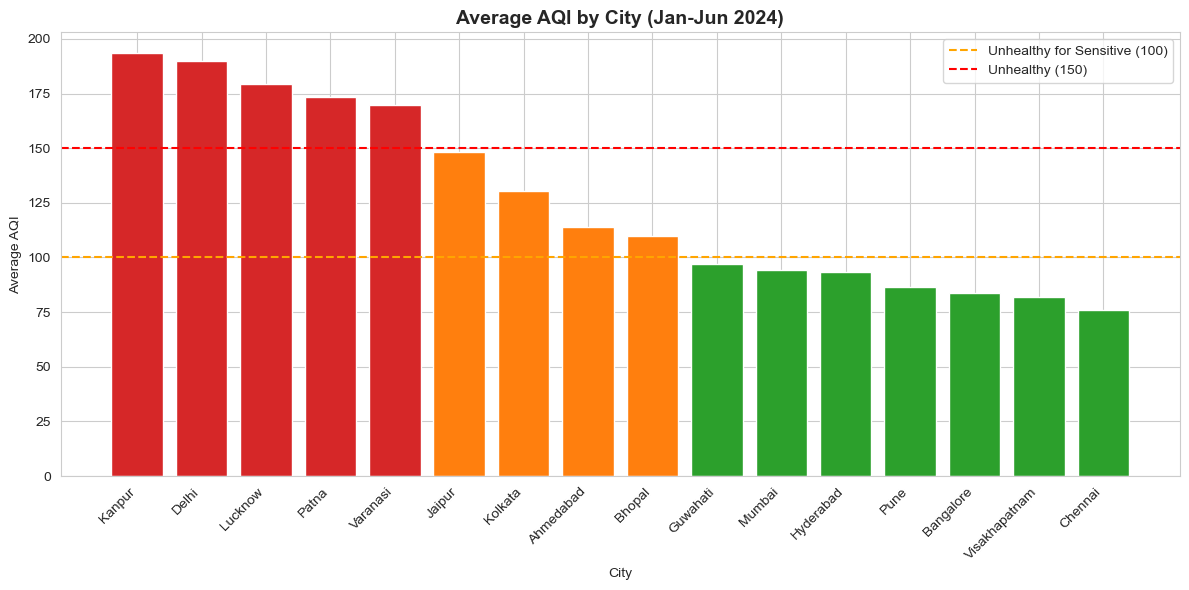

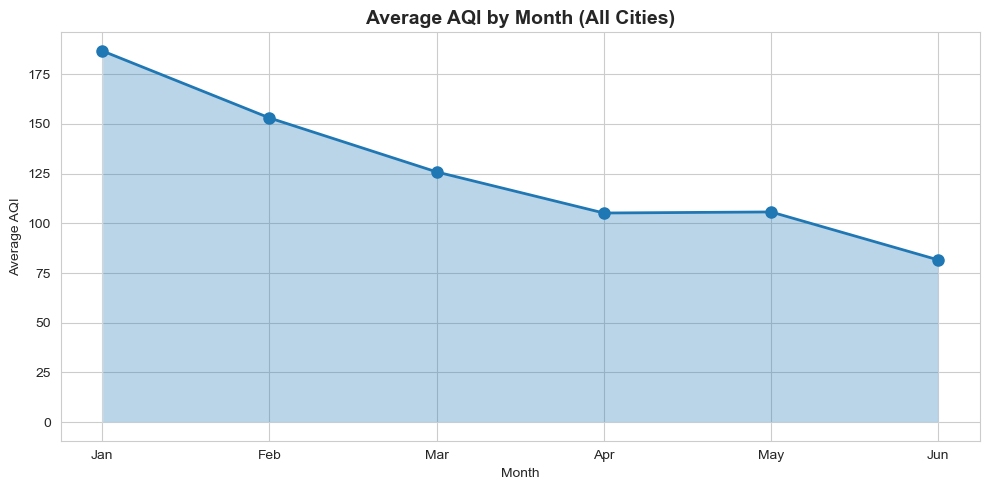

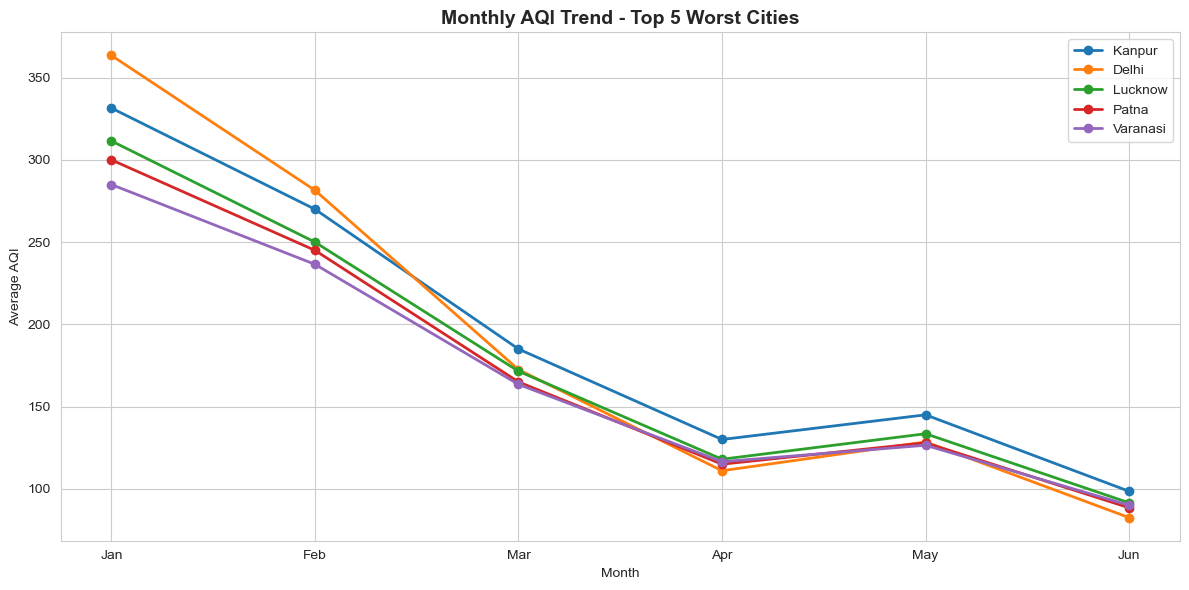

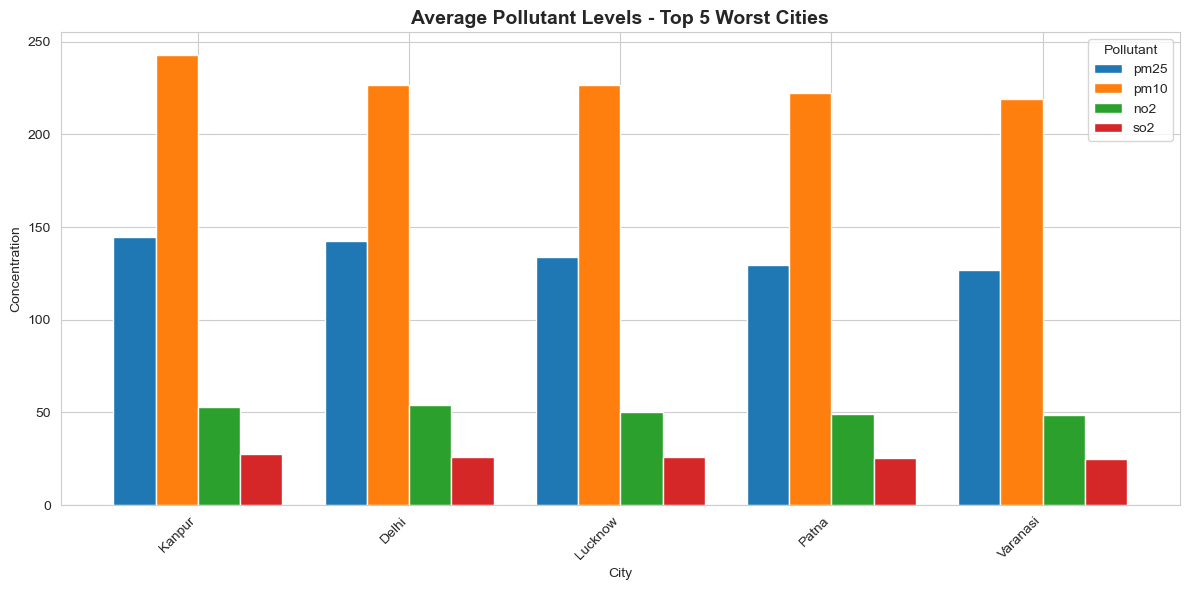

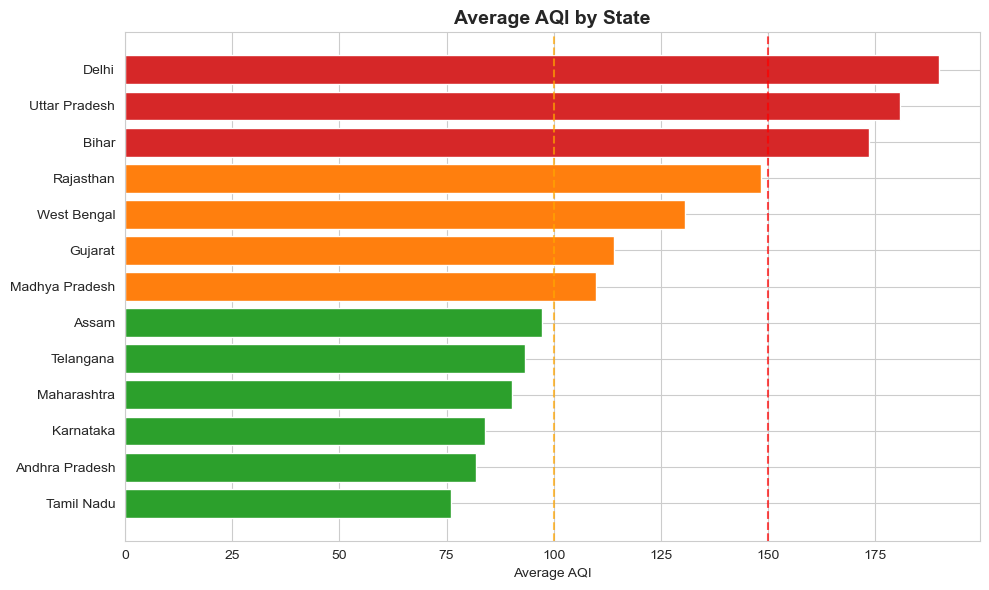

In [6]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================
# CHART 1: Average AQI by City (Bar Chart)
# ============================================
city_aqi = df.groupby('city')['aqi'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = ['#d62728' if x > 150 else '#ff7f0e' if x > 100 else '#2ca02c' for x in city_aqi.values]
bars = plt.bar(city_aqi.index, city_aqi.values, color=colors)
plt.title('Average AQI by City (Jan-Jun 2024)', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=100, color='orange', linestyle='--', label='Unhealthy for Sensitive (100)')
plt.axhline(y=150, color='red', linestyle='--', label='Unhealthy (150)')
plt.legend()
plt.tight_layout()
plt.savefig('chart1_city_aqi.png', dpi=150)
plt.show()

# ============================================
# CHART 2: Monthly AQI Trend (Line Chart)
# ============================================
df['month'] = pd.to_datetime(df['date']).dt.month
monthly_aqi = df.groupby('month')['aqi'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_aqi.index, monthly_aqi.values, marker='o', linewidth=2, markersize=8, color='#1f77b4')
plt.fill_between(monthly_aqi.index, monthly_aqi.values, alpha=0.3)
plt.title('Average AQI by Month (All Cities)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks([1,2,3,4,5,6], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.tight_layout()
plt.savefig('chart2_monthly_trend.png', dpi=150)
plt.show()

# ============================================
# CHART 3: Top 5 Worst Cities - Monthly Trend
# ============================================
worst_cities = ['Kanpur', 'Delhi', 'Lucknow', 'Patna', 'Varanasi']
df_worst = df[df['city'].isin(worst_cities)]

plt.figure(figsize=(12, 6))
for city in worst_cities:
    city_data = df_worst[df_worst['city'] == city].groupby('month')['aqi'].mean()
    plt.plot(city_data.index, city_data.values, marker='o', linewidth=2, label=city)

plt.title('Monthly AQI Trend - Top 5 Worst Cities', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks([1,2,3,4,5,6], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.legend()
plt.tight_layout()
plt.savefig('chart3_worst_cities_trend.png', dpi=150)
plt.show()

# ============================================
# CHART 4: Pollutant Comparison (Top 5 Cities)
# ============================================
pollutants = df_worst.groupby('city')[['pm25', 'pm10', 'no2', 'so2']].mean()
pollutants = pollutants.loc[worst_cities]

pollutants.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Average Pollutant Levels - Top 5 Worst Cities', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Concentration')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollutant')
plt.tight_layout()
plt.savefig('chart4_pollutants.png', dpi=150)
plt.show()

# ============================================
# CHART 5: State-level AQI (Horizontal Bar)
# ============================================
state_aqi = df.groupby('state')['aqi'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = ['#d62728' if x > 150 else '#ff7f0e' if x > 100 else '#2ca02c' for x in state_aqi.values]
plt.barh(state_aqi.index, state_aqi.values, color=colors)
plt.title('Average AQI by State', fontsize=14, fontweight='bold')
plt.xlabel('Average AQI')
plt.axvline(x=100, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=150, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('chart5_state_aqi.png', dpi=150)
plt.show()

